**AIR QUALITY PREDICTION REPORT**

This project aims to analyze and predict Air Quality Index (AQI) using two machine learning approaches:

1️.Linear Regression – To predict the exact AQI value.

2.Random Forest Classification – To classify AQI into categories (e.g., Good, Moderate, Poor, etc.).



**Importing Standard Libraries** 

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings ("ignore")

**Loading the Dataset**

In [91]:
air_qty = pd.read_csv("/Users/matadasaanvi/Desktop/Air_Quality/air_quality_data.csv")

**Data Description**

The dataset consists of air quality measurements from various locations, including:
1. City (Categorical)
2. Date (Categorical)

Pollutant levels:
1. PM2.5
2. PM10
3. NO2
4. SO2
5. O3
6. AQI (Numerical – Target for Regression)
7. AQI_Bucket (Categorical – Target for Classification)

In [92]:
air_qty.head()

,City,Date,PM2.5,PM10,NO2,SO2,O3,AQI,AQI_Bucket
0,Delhi,2022-01-13,230.50,355.43,61.28,24.28,75.14,370.0,Very Poor
1,Delhi,2022-01-14,191.47,308.74,54.37,22.47,64.80,365.0,Very Poor
2,Delhi,2022-01-15,177.71,309.85,52.51,19.12,59.73,352.0,Very Poor
3,Delhi,2022-01-16,133.56,231.04,46.86,19.06,54.00,278.0,Poor
4,Delhi,2022-01-17,235.06,353.55,47.86,14.48,64.10,350.0,Very Poor


In [93]:
air_qty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        3349 non-null   object 
 1   Date        3349 non-null   object 
 2   PM2.5       3343 non-null   float64
 3   PM10        3343 non-null   float64
 4   NO2         3343 non-null   float64
 5   SO2         3343 non-null   float64
 6   O3          3343 non-null   float64
 7   AQI         3343 non-null   float64
 8   AQI_Bucket  3343 non-null   object 
dtypes: float64(6), object(3)
memory usage: 235.6+ KB


In [94]:
air_qty.shape 

(3349, 9)

In [95]:
air_qty.describe()


,PM2.5,PM10,NO2,SO2,O3,AQI
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,59.375193,104.695375,31.558203,45.788893,53.670279,135.074190
std,55.401497,93.487948,24.123545,65.817322,26.553797,87.828822
min,2.625000,3.462500,2.958333,0.970000,4.150000,15.791667
25%,24.370000,41.702083,14.989583,11.154167,32.675000,74.791667
50%,41.410000,71.770000,25.425000,19.958333,48.187500,111.708333
75%,74.822917,141.111667,41.290833,48.437500,73.898333,170.479167
max,423.520000,761.910000,275.170833,696.583333,159.180000,595.000000


In [96]:
air_qty.isnull().sum()

City          0
Date          0
PM2.5         6
PM10          6
NO2           6
SO2           6
O3            6
AQI           6
AQI_Bucket    6
dtype: int64

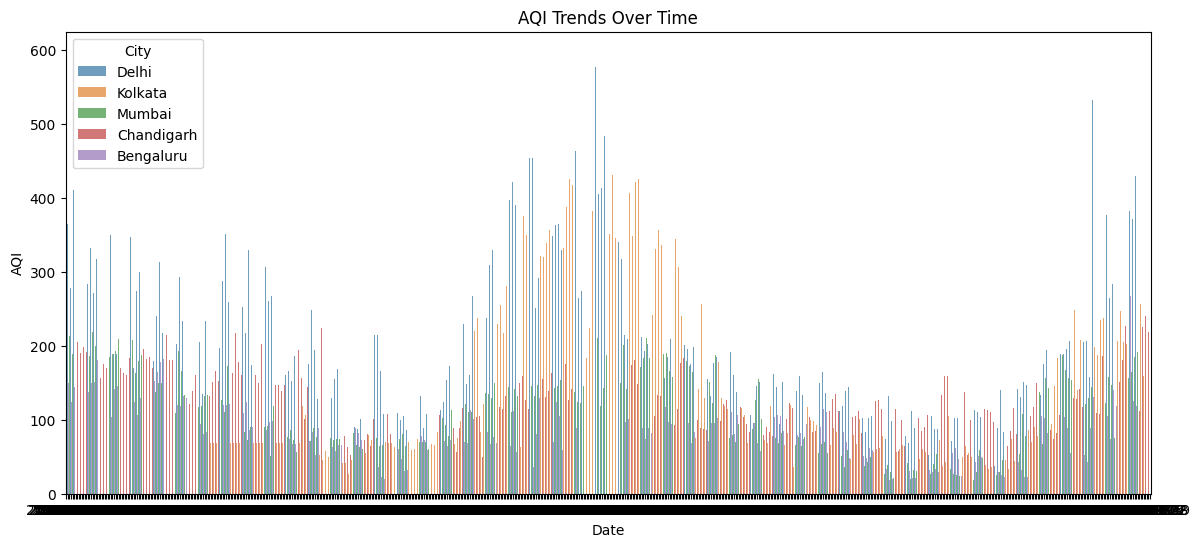

In [97]:
plt.figure(figsize=(14, 6))
sns.barplot(data=air_qty, x="Date", y="AQI", hue="City", alpha=0.7)
plt.title("AQI Trends Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


**Handling Missing Values**

In [98]:
air_qty.isnull().sum()

City          0
Date          0
PM2.5         6
PM10          6
NO2           6
SO2           6
O3            6
AQI           6
AQI_Bucket    6
dtype: int64

In [99]:
air_qty.duplicated().sum()

np.int64(0)

In [100]:
mean1 = air_qty["PM2.5"].mean()
air_qty["PM2.5"].fillna(mean1,inplace =True)

In [101]:
mean2 = air_qty["PM10"].mean()
air_qty["PM10"].fillna(mean2,inplace =True)

In [102]:
mean3 = air_qty["NO2"].mean()
air_qty["NO2"].fillna(mean3,inplace =True)

In [103]:
mean4 = air_qty["SO2"].mean()
air_qty["SO2"].fillna(mean4,inplace =True)

In [104]:
mean5 = air_qty["O3"].mean()
air_qty["O3"].fillna(mean5,inplace =True)

In [105]:
mean6 = air_qty["AQI"].mean()
air_qty["AQI"].fillna(mean6,inplace =True)

In [106]:
air_qty.isnull().sum()


City          0
Date          0
PM2.5         0
PM10          0
NO2           0
SO2           0
O3            0
AQI           0
AQI_Bucket    6
dtype: int64

**MODEL 1: LINEAR REGRESSION (AGI PREDICTION)**

**Model Setup**

-> Goal: Predict AQI using pollutant levels

-> Features (X): PM2.5, PM10, NO2, SO2, O3

-> Target (Y): AQI

-> Algorithm: Linear Regression

In [107]:
# Features and Target
x = air_qty[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']]  # Features
y = air_qty['AQI']  # Target (AQI)

# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [108]:
# Training the Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [109]:
# Predictions
y_pred = model.predict(x_test)

In [110]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:",r2)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

R² Score: 0.9351144270330923
Mean Absolute Error: 16.254693652816822
Root Mean Squared Error: 22.53134054079461


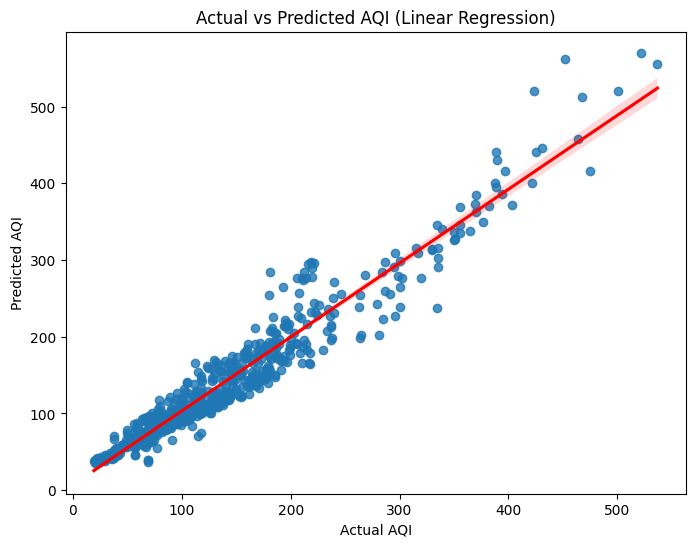

In [111]:
# Visualizing the Predictions vs Actual AQI
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")
plt.show()

**KEY POINTS FROM LINEAR REGRESSION ANALYSIS**

-> *High Accuracy:* 
The model achieves an R² score of 0.935, indicating that 93.5% of the variance in AQI is explained by the model.

-> *Low Error:*
Mean Absolute Error (MAE): 
16.25 (average difference between actual and predicted AQI).

Root Mean Squared Error (RMSE): 
22.53 (penalizes larger errors more than MAE).

-> *Visualization Interpretation:*
The scatter plot shows a strong linear relationship between actual and predicted AQI.
The red regression line closely follows the data points, indicating good model fit.


**MODEL 2: RANDOM FOREST CLASSIFICATION (AQI CATEGORY PREDICTION)**

**Model Setup**

-> Goal: Classify AQI into categories (Good, Moderate, Poor, etc.)

-> Features (X): PM2.5, PM10, NO2, SO2, O3

-> Target (Y): AQI_Bucket
 
-> Algorithm: Random Forest Classifier


**Handling missing Values** 

In [112]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Fill missing AQI_Bucket using AQI values
air_qty["AQI_Bucket"] = air_qty["AQI_Bucket"].fillna(air_qty["AQI"].apply(categorize_aqi))

# Check again
print(air_qty.isnull().sum())


City          0
Date          0
PM2.5         0
PM10          0
NO2           0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64


In [113]:
# Encode AQI_Bucket into numerical labels
label_encoder = LabelEncoder()
air_qty['AQI_Bucket'] = label_encoder.fit_transform(air_qty['AQI_Bucket'])

# Display unique classes
print("\nEncoded Labels:\n", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded Labels:
 {'Good': np.int64(0), 'Moderate': np.int64(1), 'Poor': np.int64(2), 'Satisfactory': np.int64(3), 'Severe': np.int64(4), 'Very Poor': np.int64(5)}


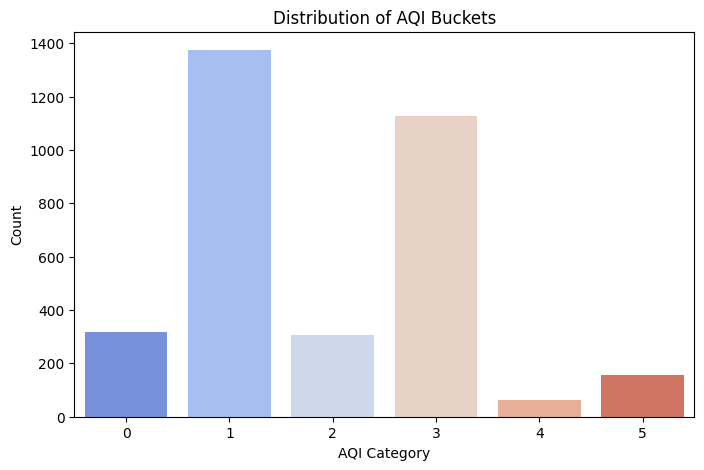

In [114]:
plt.figure(figsize=(8,5))
sns.countplot(x=air_qty['AQI_Bucket'], palette='coolwarm')
plt.title("Distribution of AQI Buckets")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()


In [115]:
# Features and Target
x = air_qty[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']] # Independent Variables
y = air_qty['AQI_Bucket']  # Target Variable

# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [116]:
# Training the Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


In [117]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.8850746268656716


**Key Points from Classification Model (Random Forest)**

*High Accuracy:*
The model achieved an accuracy of 88.5%, indicating strong classification performance.


In [118]:
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        61
           1       0.88      0.92      0.90       265
           2       0.77      0.66      0.71        65
           3       0.92      0.93      0.93       237
           4       0.67      0.83      0.74        12
           5       0.79      0.77      0.78        30

    accuracy                           0.89       670
   macro avg       0.83      0.83      0.83       670
weighted avg       0.89      0.89      0.88       670



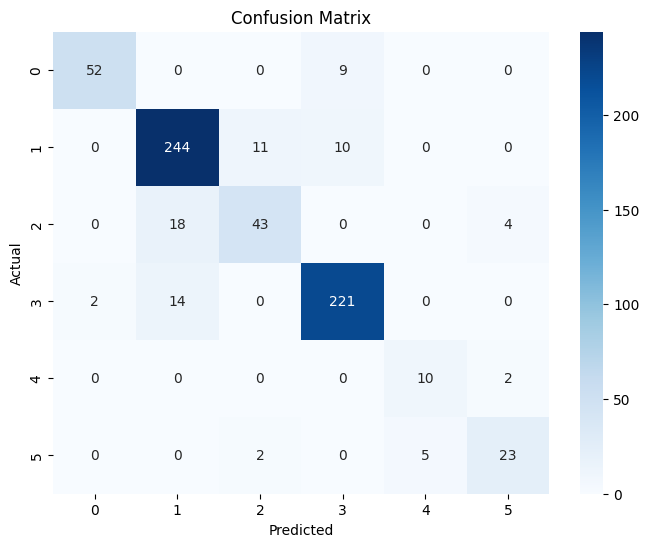

In [119]:
# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()